#Tăng cường ảnh

In [ ]:
!pip install tensorflow


In [1]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Hàm biến đổi góc chụp ảnh với perspective
def perspective_transform(image, num_transformations=5):
    h, w = image.shape[:2]
    transformed_images = []

    for _ in range(num_transformations):
        # Tạo các điểm góc ban đầu
        src_pts = np.float32([
            [0, 0],  # Góc trên bên trái
            [w - 1, 0],  # Góc trên bên phải
            [0, h - 1],  # Góc dưới bên trái
            [w - 1, h - 1]  # Góc dưới bên phải
        ])

        # Tạo các điểm góc mới sau khi biến đổi (thay đổi ngẫu nhiên góc chụp)
        dst_pts = np.float32([
            [np.random.randint(0, int(w * 0.2)), np.random.randint(0, int(h * 0.2))],  # Thay đổi góc trên bên trái
            [np.random.randint(int(w * 0.8), w), np.random.randint(0, int(h * 0.2))],  # Thay đổi góc trên bên phải
            [np.random.randint(0, int(w * 0.2)), np.random.randint(int(h * 0.8), h)],  # Thay đổi góc dưới bên trái
            [np.random.randint(int(w * 0.8), w), np.random.randint(int(h * 0.8), h)]   # Thay đổi góc dưới bên phải
        ])

        # Tính toán ma trận biến đổi perspective
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # Áp dụng phép biến đổi perspective
        transformed_image = cv2.warpPerspective(image, M, (w, h), borderMode=cv2.BORDER_REPLICATE)

        transformed_images.append(transformed_image)

    return transformed_images

# Định nghĩa ImageDataGenerator với các phép biến đổi
datagen = ImageDataGenerator(
    rotation_range=5,  # Xoay ảnh từ -5 đến 5 độ
    shear_range=0.2,   # Căng giãn ảnh (shear)
    brightness_range=[0.5, 1.5],  # Thay đổi độ sáng từ 50% đến 150%
    fill_mode='reflect',  # Lấp đầy phần trống sau biến đổi
)

# Lưu ảnh đã tăng cường vào thư mục đích
def save_augmented_images(input_directory, output_directory, num_combinations=10):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(input_directory):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Xử lý các ảnh có định dạng đúng
            image_path = os.path.join(input_directory, filename)
            image = cv2.imread(image_path)

            # Chuyển ảnh từ BGR sang RGB để tránh đảo màu
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Tạo thư mục con cho mỗi ảnh gốc
            image_name, _ = os.path.splitext(filename)
            sub_directory = os.path.join(output_directory, image_name)
            if not os.path.exists(sub_directory):
                os.makedirs(sub_directory)

            # Lưu ảnh gốc vào thư mục con
            cv2.imwrite(os.path.join(sub_directory, 'original.jpg'), cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

            # Áp dụng phép biến đổi perspective để tạo nhiều góc chụp
            transformed_images = perspective_transform(image_rgb, num_transformations=num_combinations)

            # Lưu ảnh đã biến đổi perspective
            for i, transformed_image in enumerate(transformed_images):
                cv2.imwrite(os.path.join(sub_directory, f'perspective_{i + 1}.jpg'), cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

            # Áp dụng các phép biến đổi với ImageDataGenerator và lưu ảnh đã tăng cường vào thư mục con
            for i in range(num_combinations):
                for batch in datagen.flow(np.expand_dims(image_rgb, axis=0), batch_size=1, save_to_dir=sub_directory, save_prefix='augmented', save_format='jpg'):
                    break  # Chỉ lấy 1 ảnh mỗi lần

# Sử dụng hàm
input_directory = "/kaggle/input/test-data/test_data"  # Thư mục chứa ảnh đầu vào
output_directory = "/kaggle/working/data_aug"  # Thư mục lưu ảnh đã tăng cường
save_augmented_images(input_directory, output_directory, num_combinations=50)

In [2]:
import shutil

# Đường dẫn thư mục cần nén và tệp zip
output_directory = "/kaggle/working/data_aug"
zip_file = "/kaggle/working/data_aug.zip"

# Nén thư mục thành tệp ZIP
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', output_directory)

print(f"Thư mục {output_directory} đã được nén thành {zip_file}")


Thư mục /kaggle/working/data_aug đã được nén thành /kaggle/working/data_aug.zip


# Tách thẻ sinh viên

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

def crop_and_save_images(input_directory, output_directory):
    display_count = 0  # Bộ đếm số lượng ảnh đã hiển thị

    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Chỉ xử lý các tệp có đuôi là .jpg, .jpeg hoặc .png
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, filename)
            try:
                # Đọc ảnh
                img = cv2.imread(input_image_path)

                # Chuyển ảnh sang ảnh xám
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
                # Chuyển đổi thành ảnh nhị phân bằng phương pháp Thresholding
                _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        

                # Tìm các contours trong ảnh
                contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # Chọn contour lớn nhất
                largest_contour = max(contours, key=cv2.contourArea)

                # Vẽ contour lớn nhất lên ảnh gốc
                contour_img = img.copy()
                cv2.drawContours(contour_img, [largest_contour], -1, (0, 255, 0), 10)  # Vẽ đường viền màu xanh lá (0, 255, 0)

             

                # Xác định bounding box
                x, y, w, h = cv2.boundingRect(largest_contour)

                # Cắt ảnh theo bounding box
                cropped_img = img[y:y+h, x:x+w]
                rgb_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
                #Resize ảnh về kích cỡ 1500*1100
                cropped_img = cv2.resize(cropped_img, (1500, 1100))
           
                # Lưu ảnh đã cắt vào thư mục đích
                cv2.imwrite(output_image_path, cropped_img)
            except Exception as e:
                print(f"Error processing {input_image_path}: {e}")

# Hàm để xử lý thư mục con và tạo thư mục mới
def process_directories(input_directory, output_directory, max_display=50):
    for subdir in os.listdir(input_directory):
        subdir_path = os.path.join(input_directory, subdir)

        if os.path.isdir(subdir_path):  # Kiểm tra nếu đó là thư mục
            # Tạo thư mục con trong thư mục đích
            output_subdir = os.path.join(output_directory, subdir)
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # Gọi hàm crop_and_save_images để xử lý ảnh trong thư mục con
            crop_and_save_images(subdir_path, output_subdir)

# Sử dụng hàm
input_directory = "/kaggle/input/data-aug"  # Thư mục chứa các ảnh đã tăng cường
output_directory = "/kaggle/working/cropped_images"  # Thư mục đích để lưu các ảnh đã cắt
process_directories(input_directory, output_directory)


In [6]:
import shutil

# Đường dẫn thư mục cần nén và tệp zip
output_directory = "/kaggle/working/cropped_images"
zip_file = "/kaggle/working/cropped_images.zip"

# Nén thư mục thành tệp ZIP
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', output_directory)

print(f"Thư mục {output_directory} đã được nén thành {zip_file}")


Thư mục /kaggle/working/cropped_images đã được nén thành /kaggle/working/cropped_images.zip


# Đọc thông tin nhãn ở tập train & Tính tọa độ 4 góc của mỗi đối tượng

In [16]:
import xml.etree.ElementTree as ET

# Load file
tree = ET.parse('/kaggle/input/training-data-segmentation/training_data_segmentation/annotations.xml')
root = tree.getroot()

# Initialize dictionary to store total coordinates for each label
total_coordinates = {}

# Initialize dictionary to store total number of boxes for each label
total_boxes = {}

# Initialize variables to store maximum box for 'hoten' label
max_hoten_box = None
max_hoten_area = -float('inf')

# Iterate through each image
for image in root.findall('image'):
    # Iterate through each box in the image
    for box in image.findall('box'):
        label = box.get('label')
        xtl = float(box.get('xtl'))
        ytl = float(box.get('ytl'))
        xbr = float(box.get('xbr'))
        ybr = float(box.get('ybr'))

        # Initialize total coordinates and total number of boxes for each label if not already present
        if label not in total_coordinates:
            total_coordinates[label] = {
                'top_left_x': 0,
                'top_left_y': 0,
                'top_right_x': 0,
                'top_right_y': 0,
                'bottom_left_x': 0,
                'bottom_left_y': 0,
                'bottom_right_x': 0,
                'bottom_right_y': 0,
            }
            total_boxes[label] = 0

        # Accumulate coordinates for each box
        total_coordinates[label]['top_left_x'] += xtl
        total_coordinates[label]['top_left_y'] += ytl
        total_coordinates[label]['top_right_x'] += xbr
        total_coordinates[label]['top_right_y'] += ytl
        total_coordinates[label]['bottom_left_x'] += xtl
        total_coordinates[label]['bottom_left_y'] += ybr
        total_coordinates[label]['bottom_right_x'] += xbr
        total_coordinates[label]['bottom_right_y'] += ybr
        total_boxes[label] += 1

        # Update maximum box for 'hoten' label
        if label == 'hoten':
            area = (xbr - xtl) * (ybr - ytl)
            if area > max_hoten_area:
                max_hoten_area = area
                max_hoten_box = (xtl, ytl, xbr, ybr)

# Calculate average coordinates for each label
average_coordinates = {}
for label, coords in total_coordinates.items():
    avg_top_left_x = coords['top_left_x'] / total_boxes[label]
    avg_top_left_y = coords['top_left_y'] / total_boxes[label]
    avg_top_right_x = coords['top_right_x'] / total_boxes[label]
    avg_top_right_y = coords['top_right_y'] / total_boxes[label]
    avg_bottom_left_x = coords['bottom_left_x'] / total_boxes[label]
    avg_bottom_left_y = coords['bottom_left_y'] / total_boxes[label]
    avg_bottom_right_x = coords['bottom_right_x'] / total_boxes[label]
    avg_bottom_right_y = coords['bottom_right_y'] / total_boxes[label]

    average_coordinates[label] = {
        'top_left': (avg_top_left_x, avg_top_left_y),
        'top_right': (avg_top_right_x, avg_top_right_y),
        'bottom_left': (avg_bottom_left_x, avg_bottom_left_y),
        'bottom_right': (avg_bottom_right_x, avg_bottom_right_y)
    }

# Print average coordinates for each label
for label, coords in average_coordinates.items():
    if label != 'hoten':
        print(f"Average Coordinates for '{label}':")
        print("Top Left (xtl, ytl):", coords['top_left'])
        print("Top Right (xtr, ytr):", coords['top_right'])
        print("Bottom Left (xbl, ybl):", coords['bottom_left'])
        print("Bottom Right (xbr, ybr):", coords['bottom_right'])

# Print maximum box for 'hoten' label
print("Maximum Box for 'hoten' label:")
print("Top Left (xtl, ytl):", max_hoten_box[:2])
print("Top Right (xtr, ytr):", max_hoten_box[2], max_hoten_box[1])
print("Bottom Left (xbl, ybl):", max_hoten_box[0], max_hoten_box[3])
print("Bottom Right (xbr, ybr):", max_hoten_box[2:])


Average Coordinates for 'lop':
Top Left (xtl, ytl): (561.8979999999999, 855.0944999999999)
Top Right (xtr, ytr): (1207.3857500000001, 855.0944999999999)
Bottom Left (xbl, ybl): (561.8979999999999, 922.6684999999998)
Bottom Right (xbr, ybr): (1207.3857500000001, 922.6684999999998)
Average Coordinates for 'nienkhoa':
Top Left (xtl, ytl): (561.7955, 937.8652500000002)
Top Right (xtr, ytr): (1066.9892499999999, 937.8652500000002)
Bottom Left (xbl, ybl): (561.7955, 1001.3982499999998)
Bottom Right (xbr, ybr): (1066.9892499999999, 1001.3982499999998)
Average Coordinates for 'anhthe':
Top Left (xtl, ytl): (174.64275000000004, 419.5722499999999)
Top Right (xtr, ytr): (489.65250000000003, 419.5722499999999)
Bottom Left (xbl, ybl): (174.64275000000004, 899.0204999999996)
Bottom Right (xbr, ybr): (489.65250000000003, 899.0204999999996)
Average Coordinates for 'ngaysinh':
Top Left (xtl, ytl): (563.1184999999998, 775.776)
Top Right (xtr, ytr): (1083.3740000000003, 775.776)
Bottom Left (xbl, ybl): (

In [17]:
def get_all_coordinates(average_coordinates, max_hoten_box):
    all_coordinates = []

    # Add coordinates for each label except 'hoten'
    for label, coords in average_coordinates.items():
        if label != 'hoten':
            all_coordinates.append({
                'label': label,
                'top_left': coords['top_left'],
                'top_right': coords['top_right'],
                'bottom_left': coords['bottom_left'],
                'bottom_right': coords['bottom_right']
            })

    # Add coordinates for 'hoten' label
    all_coordinates.append({
        'label': 'hoten',
        'top_left': (max_hoten_box[0], max_hoten_box[1]),
        'top_right': (max_hoten_box[2], max_hoten_box[1]),
        'bottom_left': (max_hoten_box[0], max_hoten_box[3]),
        'bottom_right': (max_hoten_box[2], max_hoten_box[3])
    })

    return all_coordinates

# Example usage:
all_coordinates = get_all_coordinates(average_coordinates, max_hoten_box)
print(all_coordinates)


[{'label': 'lop', 'top_left': (561.8979999999999, 855.0944999999999), 'top_right': (1207.3857500000001, 855.0944999999999), 'bottom_left': (561.8979999999999, 922.6684999999998), 'bottom_right': (1207.3857500000001, 922.6684999999998)}, {'label': 'nienkhoa', 'top_left': (561.7955, 937.8652500000002), 'top_right': (1066.9892499999999, 937.8652500000002), 'bottom_left': (561.7955, 1001.3982499999998), 'bottom_right': (1066.9892499999999, 1001.3982499999998)}, {'label': 'anhthe', 'top_left': (174.64275000000004, 419.5722499999999), 'top_right': (489.65250000000003, 419.5722499999999), 'bottom_left': (174.64275000000004, 899.0204999999996), 'bottom_right': (489.65250000000003, 899.0204999999996)}, {'label': 'ngaysinh', 'top_left': (563.1184999999998, 775.776), 'top_right': (1083.3740000000003, 775.776), 'bottom_left': (563.1184999999998, 841.5652499999999), 'bottom_right': (1083.3740000000003, 841.5652499999999)}, {'label': 'msv', 'top_left': (150.86325, 947.2790000000001), 'top_right': (5

# Áp dụng template lên ảnh & Trích xuất các vùng thông tin

In [ ]:
import cv2
import numpy as np
import os

# Hàm để đọc file labelmap và lưu trữ màu sắc tương ứng với từng nhãn vào từ điển
def load_label_colors(labelmap_path):
    label_colors = {}
    with open(labelmap_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith('#'):
                parts = line.strip().split(':')
                label = parts[0].strip()
                color_str = parts[1].strip()
                if color_str:
                    color_rgb = tuple(map(int, color_str.split(',')))
                    label_colors[label] = color_rgb
    return label_colors

# Hàm để vẽ bounding box trên ảnh
def draw_bounding_boxes(image_path, result, label_colors):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for box in result:
        label = box['label']
        top_left = tuple(map(int, box['top_left']))
        bottom_right = tuple(map(int, box['bottom_right']))

        # Lấy màu từ label_colors hoặc mặc định là đỏ
        color = label_colors.get(label, (255, 0, 0))

        # Vẽ bounding box
        cv2.rectangle(image, top_left, bottom_right, color, thickness=3)

        # Hiển thị nhãn
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
        text_w, text_h = text_size
        text_pos = (top_left[0], top_left[1] - 10 if top_left[1] - 10 > text_h else top_left[1] + text_h + 10)
        cv2.putText(image, label, text_pos, font, font_scale, (255, 255, 255), font_thickness)

    return image



# Hàm để cắt và lưu các bounding box theo từng thông tin
def crop_and_save_boxes(image_path, result, output_directory, folder_name):
    image = cv2.imread(image_path)
    image_name = os.path.splitext(os.path.basename(image_path))[0]

    # Phân tách folder_name thành các phần thông tin
    parts = folder_name.split('_')

    # Các thông tin sẽ được dùng để tạo cấu trúc thư mục
    tên_sinh_vien = parts[0] + " " + parts[1]  # Ví dụ: Hồ Ái Nhi
    ngày_sinh = parts[2]  # Ví dụ: 24-06-2003
    lớp_học = parts[3]  # Ví dụ: Công nghệ sinh học-K45
    mã_sinh_vien = parts[4]  # Ví dụ: 21T3040021

    for box in result:
        label = box['label']
        top_left = tuple(map(int, box['top_left']))
        bottom_right = tuple(map(int, box['bottom_right']))

        x1, y1 = top_left
        x2, y2 = bottom_right
        cropped_image = image[y1:y2, x1:x2]

        # Tạo cấu trúc thư mục cho từng thông tin
        label_dir = os.path.join(
            output_directory,
            'hoten', tên_sinh_vien,
            'ngaysinh', ngày_sinh,
            'lop', lớp_học,
            'msv', mã_sinh_vien
        )

        os.makedirs(label_dir, exist_ok=True)

        # Tạo tên file không trùng
        img_count = len(os.listdir(label_dir)) + 1
        output_path = os.path.join(label_dir, f"{image_name}_{img_count}.png")

        # Lưu ảnh cắt
        cv2.imwrite(output_path, cropped_image)

# Cấu hình thư mục đầu vào và đầu ra
input_directory = '/kaggle/input/cropped-images'
output_directory = '/kaggle/working/all_data'
os.makedirs(output_directory, exist_ok=True)


# Duyệt qua từng thư mục trong thư mục gốc
for foldername in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(folder_path, filename)

                # Cắt và lưu các bounding box
                crop_and_save_boxes(image_path, all_coordinates, output_directory, foldername)

print("Hoàn tất xử lý ảnh.")




In [12]:
import shutil

# Đường dẫn thư mục cần nén và tệp zip
output_directory = "/kaggle/working/all_data"
zip_file = "/kaggle/working/all_data.zip"

# Nén thư mục thành tệp ZIP
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', output_directory)

print(f"Thư mục {output_directory} đã được nén thành {zip_file}")

Thư mục /kaggle/working/training đã được nén thành /kaggle/working/training.zip


# Huấn luyện mô hình svm


In [1]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.



Processing category: anhthe
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'kernel': 'poly', 'probability': True}
                          precision    recall  f1-score   support

      Ảnh Hoàng Anh Hùng       0.90      0.95      0.93        20
   Ảnh Hà Gia Quang Định       0.85      0.85      0.85        20
       Ảnh Hồ Thị Ái Nhi       1.00      0.80      0.89        20
 Ảnh Lê Phước Phương Phi       0.87      1.00      0.93        20
         Ảnh Lê Văn Dũng       1.00      0.70      0.82        20
        Ảnh Lê Ánh Tuyết       0.95      1.00      0.98        20
    Ảnh Nguyễn Châu Tuấn       0.94      0.85      0.89        20
      Ảnh Nguyễn Duy Rôn       0.90      0.86      0.88        21
   Ảnh Nguyễn Hoàng Long       0.91      1.00      0.95        20
  Ảnh Nguyễn Quý Tuệ Nhi       0.90      0.95      0.93        20
     Ảnh Nguyễn Quốc Duy       0.91      1.00      0.95

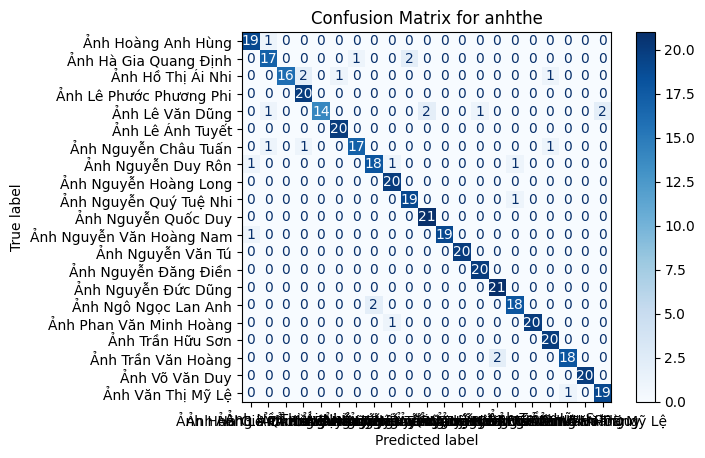

Model saved to /kaggle/working/models/svm_anhthe.pkl

Processing category: lop
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'kernel': 'rbf', 'probability': True}
                         precision    recall  f1-score   support

 Công nghệ sinh học-K45       0.88      0.71      0.79       101
Công nghệ thông tin-K45       0.80      0.91      0.85       182
Công nghệ thông tin-K48       0.90      0.87      0.89       141

               accuracy                           0.85       424
              macro avg       0.86      0.83      0.84       424
           weighted avg       0.85      0.85      0.85       424



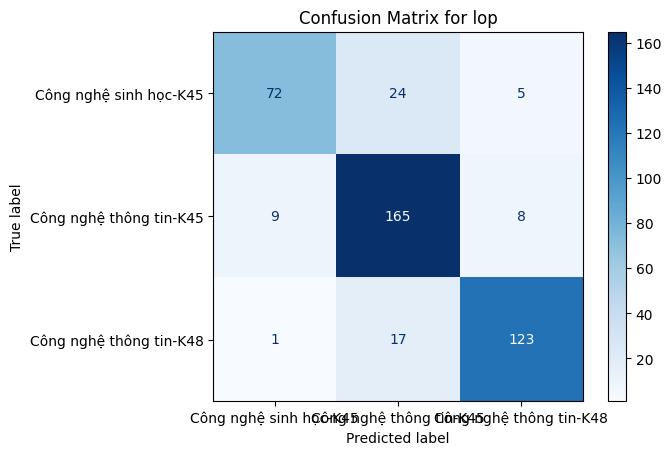

Model saved to /kaggle/working/models/svm_lop.pkl

Processing category: ngaysinh
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

  03-05-2006       0.83      0.75      0.79        20
  05-06-2006       0.73      0.95      0.83        20
  05-09-2003       0.65      0.65      0.65        20
  06-03-2003       0.67      0.80      0.73        20
  07-02-2003       1.00      0.80      0.89        20
  07-10-2006       0.93      0.70      0.80        20
  08-08-2003       0.93      0.65      0.76        20
  10-04-2006       0.88      0.75      0.81        20
  10-05-2006       0.93      0.70      0.80        20
  10-09-2003       0.76      0.76      0.76        21
  11-05-2003       0.81      0.65      0.72        20
  12-15-2003       0.93      0.70      0.80        20
  13-02-2003       0.50     

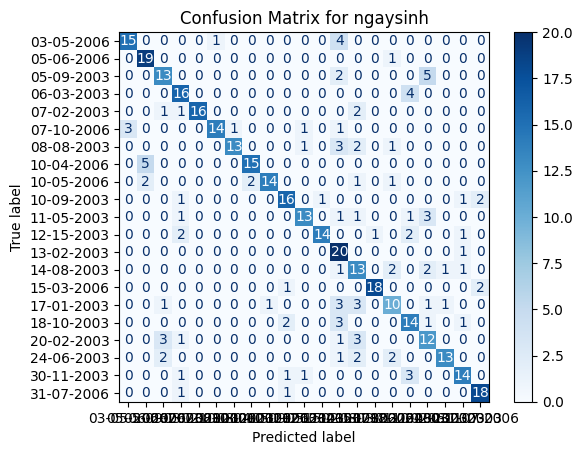

Model saved to /kaggle/working/models/svm_ngaysinh.pkl

Processing category: nienkhoa
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

   2021-2025       0.70      0.85      0.77       182
   2021-2026       0.74      0.54      0.63       101
   2024-2028       0.79      0.74      0.76       141

    accuracy                           0.74       424
   macro avg       0.75      0.71      0.72       424
weighted avg       0.74      0.74      0.73       424



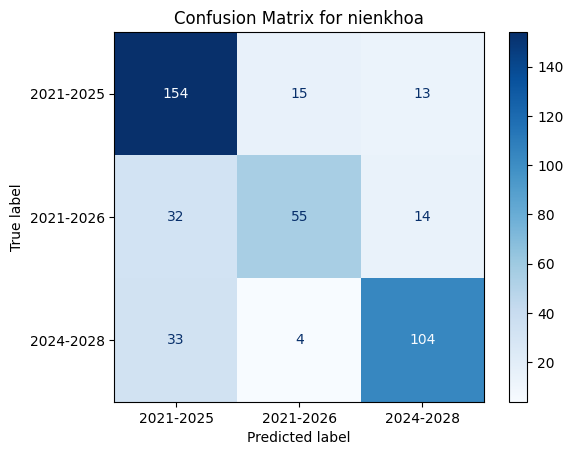

Model saved to /kaggle/working/models/svm_nienkhoa.pkl

Processing category: masinhvien
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

  21T1020023       0.34      0.70      0.46        20
  21T1020303       0.91      0.50      0.65        20
  21T1020324       0.83      0.75      0.79        20
  21T1020400       0.54      0.65      0.59        20
  21T1020578       0.71      0.60      0.65        20
  21T1020658       0.94      0.80      0.86        20
  21T1020795       0.55      0.55      0.55        20
  21T1020871       0.43      0.43      0.43        21
  21T1020892       0.67      0.60      0.63        20
  21T3040010       0.67      0.40      0.50        20
  21T3040016       0.67      0.48      0.56        21
  21T3040021       0.82      0.45      0.58        20
  21T3040022       0.

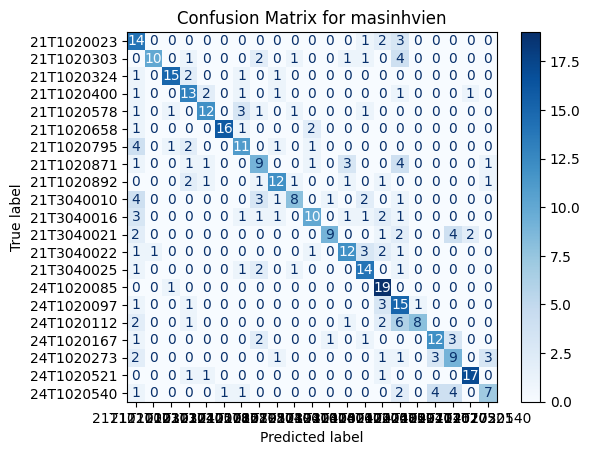

Model saved to /kaggle/working/models/svm_masinhvien.pkl

Processing category: hoten
Number of training samples: 1695
Number of testing samples: 424
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 0.1, 'kernel': 'poly', 'probability': True}
                      precision    recall  f1-score   support

      Hoàng Anh Hùng       0.94      0.75      0.83        20
      Huỳnh Đức Dũng       0.74      1.00      0.85        20
   Hà Gia Quang Định       0.68      0.85      0.76        20
       Hồ Thị Ái Nhi       1.00      0.95      0.97        20
 Lê Phước Phương Phi       0.88      0.75      0.81        20
         Lê Văn Dũng       0.86      0.95      0.90        20
        Lê Ánh Tuyết       1.00      0.75      0.86        20
    Nguyễn Châu Tuấn       0.65      0.95      0.77        21
      Nguyễn Duy Rôn       0.83      0.50      0.62        20
   Nguyễn Hoàng Long       1.00      1.00      1.00        20
  Nguyễn Quý Tuệ Nhi       0.95      0.86

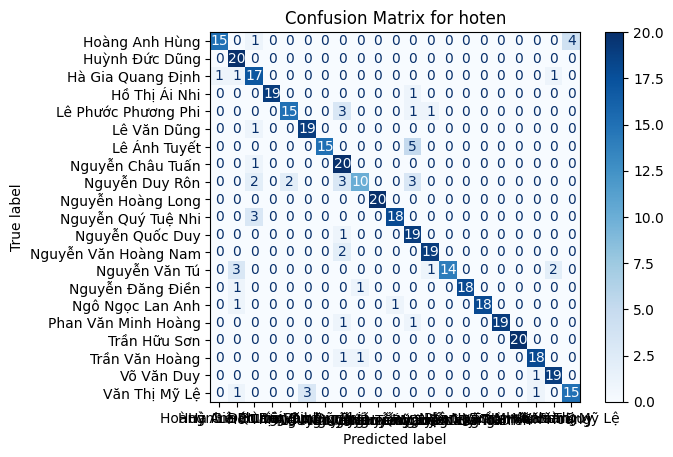

Model saved to /kaggle/working/models/svm_hoten.pkl


In [2]:
# 1
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Hàm để đọc dữ liệu từ thư mục
def load_data_from_directory(directory):
    data = []
    labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (128, 128))  # Resize ảnh về kích thước cố định
                    img = img / 255.0 
                    data.append(img.flatten())  # Chuyển ảnh thành vector 1 chiều
                    labels.append(class_name)  # Nhãn là tên thư mục con
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(data), np.array(labels)

# Hàm huấn luyện mô hình SVM với tinh chỉnh siêu tham số bằng Grid Search
def train_svm_with_grid_search(category_directory, model_output_path):
    print(f"\nProcessing category: {os.path.basename(category_directory)}")

    # Load dữ liệu
    data, labels = load_data_from_directory(category_directory)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Number of training samples: {len(X_train)}")
    print(f"Number of testing samples: {len(X_test)}")

    # Thiết lập lưới siêu tham số cho Grid Search
    param_grid = {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf', 'poly'],
        'probability': [True]
    }

    # Tìm kiếm siêu tham số tốt nhất với Grid Search
    grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Lấy mô hình tốt nhất và thông số
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Đánh giá mô hình trên tập kiểm tra
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=np.unique(labels))
    print(report)

    # Hiển thị ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(labels))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {os.path.basename(category_directory)}")
    plt.show()

    # Lưu mô hình
    joblib.dump(best_model, model_output_path)
    print(f"Model saved to {model_output_path}")

# Thư mục chứa các loại thông tin
base_directory = "/kaggle/input/all-data/all_data"  # Thay bằng đường dẫn thực tế
output_model_directory = "/kaggle/working/models"  # Thư mục lưu mô hình
os.makedirs(output_model_directory, exist_ok=True)

# Lặp qua từng thư mục con trong base_directory
for category in os.listdir(base_directory):
    category_path = os.path.join(base_directory, category)
    if os.path.isdir(category_path):
        model_output_path = os.path.join(output_model_directory, f"svm_{category}.pkl")
        train_svm_with_grid_search(category_path, model_output_path)


In [36]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

# Hàm để đọc dữ liệu từ thư mục
def load_data_from_directory(directory):
    data = []
    labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (128, 128))  # Resize ảnh về kích thước cố định
                    img = img / 255.0 
                    data.append(img.flatten())  # Chuyển ảnh thành vector 1 chiều
                    labels.append(class_name)  # Nhãn là tên thư mục con
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(data), np.array(labels)

# Hàm huấn luyện mô hình SVM cho từng loại thông tin
def train_svm_for_category(category_directory, model_output_path):
    print(f"\nProcessing category: {os.path.basename(category_directory)}")

    # Load dữ liệu
    data, labels = load_data_from_directory(category_directory)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Number of training samples: {len(X_train)}")
    print(f"Number of testing samples: {len(X_test)}")

    # Huấn luyện mô hình SVM
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)

    # Đánh giá mô hình
    y_pred = svm.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=np.unique(labels))
    print(report)

    # Lưu mô hình
    joblib.dump(svm, model_output_path)
    print(f"Model saved to {model_output_path}")

# Thư mục chứa các loại thông tin
base_directory = "/kaggle/input/all-data/all_data"  # Thay bằng đường dẫn thực tế
output_model_directory = "/kaggle/working/models"  # Thư mục lưu mô hình
os.makedirs(output_model_directory, exist_ok=True)

# Lặp qua từng thư mục con trong base_directory
for category in os.listdir(base_directory):
    category_path = os.path.join(base_directory, category)
    if os.path.isdir(category_path):
        model_output_path = os.path.join(output_model_directory, f"svm_{category}.pkl")
        train_svm_for_category(category_path, model_output_path)



Processing category: anhthe
Number of training samples: 1695
Number of testing samples: 424
                          precision    recall  f1-score   support

      Ảnh Hoàng Anh Hùng       0.90      0.95      0.93        20
   Ảnh Hà Gia Quang Định       0.77      0.85      0.81        20
       Ảnh Hồ Thị Ái Nhi       1.00      0.80      0.89        20
 Ảnh Lê Phước Phương Phi       0.87      1.00      0.93        20
         Ảnh Lê Văn Dũng       1.00      0.65      0.79        20
        Ảnh Lê Ánh Tuyết       0.95      1.00      0.98        20
    Ảnh Nguyễn Châu Tuấn       0.94      0.85      0.89        20
      Ảnh Nguyễn Duy Rôn       0.90      0.86      0.88        21
   Ảnh Nguyễn Hoàng Long       0.91      1.00      0.95        20
  Ảnh Nguyễn Quý Tuệ Nhi       0.90      0.95      0.93        20
     Ảnh Nguyễn Quốc Duy       0.91      1.00      0.95        21
Ảnh Nguyễn Văn Hoàng Nam       1.00      0.95      0.97        20
       Ảnh Nguyễn Văn Tú       1.00      1.00   

In [3]:
import shutil

# Đường dẫn thư mục cần nén và tệp zip
output_directory = "/kaggle/working/models"
zip_file = "/kaggle/working/models.zip"

# Nén thư mục thành tệp ZIP
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', output_directory)

print(f"Thư mục {output_directory} đã được nén thành {zip_file}")

Thư mục /kaggle/working/models đã được nén thành /kaggle/working/models.zip


# Thực nghiệm

In [42]:
import cv2
from joblib import load
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Hàm tách thẻ từ ảnh
def crop_card(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped_img = img[y:y + h, x:x + w]
        cropped_img = cv2.resize(cropped_img, (1500, 1100))
        return cropped_img
    except Exception as e:
        print(f"Lỗi khi tách thẻ: {e}")
        return None

# Hàm tách thông tin từ tọa độ
def crop_info_from_coordinates(image, coordinates):
    try:
        extracted_info = {}
        for item in coordinates:
            label = item['label']
            top_left = tuple(map(int, item['top_left']))
            bottom_right = tuple(map(int, item['bottom_right']))
            x1, y1 = top_left
            x2, y2 = bottom_right
            cropped_info = image[y1:y2, x1:x2]
            extracted_info[label] = cropped_info
        return extracted_info
    except Exception as e:
        print(f"Lỗi khi tách thông tin: {e}")
        return None

# Hàm dự đoán thông tin
def predict_info(extracted_info, models):
    predictions = {}
    for label, cropped_image in extracted_info.items():
        if label in models:
            # Tiền xử lý ảnh cho mô hình
            gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (128, 128))  # Resize về kích thước chuẩn
            img = resized / 255.0 
            flattened = img.flatten().reshape(1, -1)  # Chuyển thành vector

            # Dự đoán
            model = models[label]
            predicted_class = model.predict(flattened)[0]
            
            predicted_probs = model.predict_proba(flattened)[0]  # Xác suất của từng lớp

            # In xác suất cho từng lớp
            print('Xác suất cho từng lớp của:', label)
            for class_name, prob in zip(model.classes_, predicted_probs):
                print(f"      +{class_name}: {prob:.2f}")


            
            predictions[label] = predicted_class
        else:
            predictions[label] = "Mô hình không tồn tại"
    return predictions

# Hàm xử lý toàn bộ quy trình
def process_and_predict(image_path, coordinates, models):
    cropped_card = crop_card(image_path)
    if cropped_card is not None:
        extracted_info = crop_info_from_coordinates(cropped_card, coordinates)
        if extracted_info:
            predictions = predict_info(extracted_info, models)
            return predictions, extracted_info
    return None, None




Xác suất cho từng lớp của: lop
      +Công nghệ sinh học-K45: 0.07
      +Công nghệ thông tin-K45: 0.81
      +Công nghệ thông tin-K48: 0.12
Xác suất cho từng lớp của: nienkhoa
      +2021-2025: 0.64
      +2021-2026: 0.15
      +2024-2028: 0.21
Xác suất cho từng lớp của: anhthe
      +Ảnh Hoàng Anh Hùng: 0.88
      +Ảnh Hà Gia Quang Định: 0.01
      +Ảnh Hồ Thị Ái Nhi: 0.00
      +Ảnh Lê Phước Phương Phi: 0.01
      +Ảnh Lê Văn Dũng: 0.00
      +Ảnh Lê Ánh Tuyết: 0.00
      +Ảnh Nguyễn Châu Tuấn: 0.01
      +Ảnh Nguyễn Duy Rôn: 0.00
      +Ảnh Nguyễn Hoàng Long: 0.02
      +Ảnh Nguyễn Quý Tuệ Nhi: 0.01
      +Ảnh Nguyễn Quốc Duy: 0.00
      +Ảnh Nguyễn Văn Hoàng Nam: 0.02
      +Ảnh Nguyễn Văn Tú: 0.01
      +Ảnh Nguyễn Đăng Điền: 0.00
      +Ảnh Nguyễn Đức Dũng: 0.00
      +Ảnh Ngô Ngọc Lan Anh: 0.01
      +Ảnh Phan Văn Minh Hoàng: 0.00
      +Ảnh Trần Hữu Sơn: 0.01
      +Ảnh Trần Văn Hoàng: 0.00
      +Ảnh Võ Văn Duy: 0.00
      +Ảnh Văn Thị Mỹ Lệ: 0.00
Xác suất cho từng lớp của: n

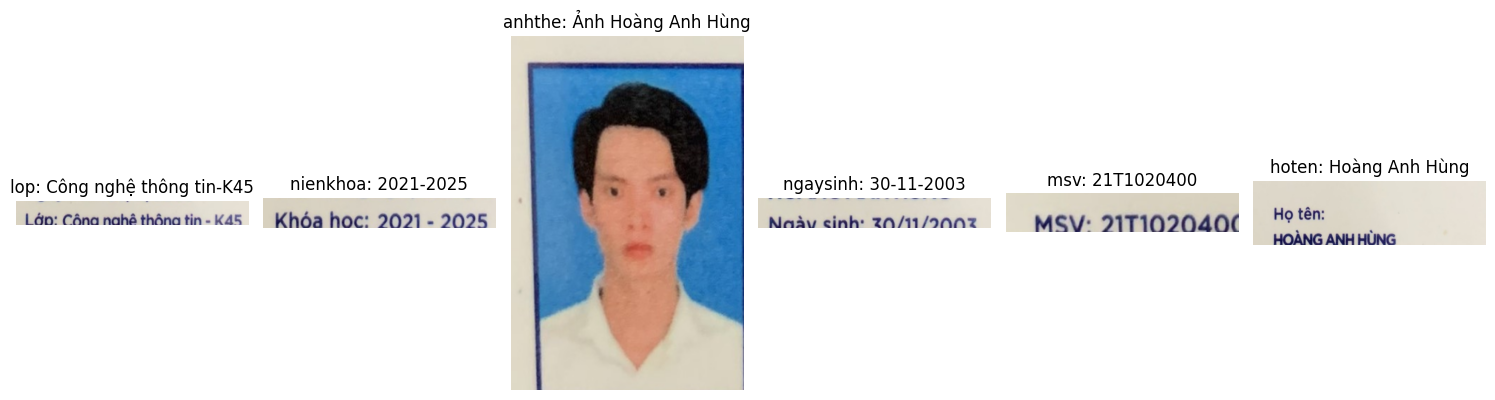

In [44]:
# Đọc các mô hình đã lưu
model_paths = {
    'hoten': '/kaggle/input/models/svm_hoten.pkl',
    'ngaysinh': '/kaggle/input/models/svm_ngaysinh.pkl',
    'lop': '/kaggle/input/models/svm_lop.pkl',
    'msv': '/kaggle/input/models/svm_masinhvien.pkl',
    'nienkhoa':'/kaggle/input/models/svm_nienkhoa.pkl',
    'anhthe': '/kaggle/input/models/svm_anhthe.pkl'
}


models_svm = {}
for label, path in model_paths.items():
    models_svm[label] = load(path)  # Sử dụng joblib để load mô hình



# Đường dẫn ảnh mới
image_path = "/kaggle/input/testdata/test_data/Công nghệ thông tin-K45_2021-2025_Ảnh Hoàng Anh Hùng_30-11-2003_21T1020400_Hoàng Anh Hùng.jpg"

# Dự đoán
predictions, extracted_info = process_and_predict(image_path, all_coordinates, models_svm)

# Hiển thị kết quả
if predictions:
    print("Dự đoán thông tin:")
    for label, predicted_class in predictions.items():
        print(f"{label}: {predicted_class}")

    # Hiển thị từng thông tin đã cắt
    plt.figure(figsize=(15, 4))
    for i, (label, cropped_image) in enumerate(extracted_info.items(), start=1):
        plt.subplot(1, len(extracted_info), i)
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"{label}: {predictions[label]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("Không thể xử lý và dự đoán ảnh.")

In [15]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.3 MB/s eta 0:00:00a 0:00:01


In [16]:
from docx import Document
from docx.shared import Inches
import cv2
import os

# Hàm lưu thông tin sinh viên và ảnh thẻ vào file Word
def save_student_info_to_word(predictions, extracted_info, output_path="student_info.docx"):
    # Tạo file Word mới
    doc = Document()
    doc.add_heading("Thông tin Sinh viên", level=1)

    # Thêm thông tin sinh viên (từ dự đoán)
    doc.add_heading("Thông tin chi tiết:", level=2)
    for label, predicted_class in predictions.items():
        if label != "anhthe":  # Bỏ qua nhãn ảnh thẻ
            doc.add_paragraph(f"{label.capitalize()}: {predicted_class}")

    # Thêm ảnh thẻ
    if "anhthe" in extracted_info:
        doc.add_heading("Ảnh thẻ:", level=2)
        # Lưu ảnh thẻ tạm thời
        temp_image_path = "temp_anhthe.jpg"
        cv2.imwrite(temp_image_path, extracted_info["anhthe"])

        # Chèn ảnh vào file Word
        doc.add_picture(temp_image_path, width=Inches(2))

        # Xóa ảnh tạm
        os.remove(temp_image_path)

    # Lưu file Word
    doc.save(output_path)
    print(f"Kết quả đã được lưu vào file Word: {output_path}")

# Sử dụng hàm để lưu kết quả
if predictions:
    save_student_info_to_word(predictions, extracted_info, output_path="student_info.docx")
else:
    print("Không có kết quả để lưu.")


Kết quả đã được lưu vào file Word: student_info.docx
